In [ ]:
#Intro to Recurrent Neural Networks(RNNs)

In [ ]:
 #RNNs In Practice: Simple RNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
max_features = 20000
sequence_length = 200

(train_data, train_labels), (val_data, val_labels) = keras.datasets.imdb.load_data(num_words=max_features)

In [3]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [5]:
 #Preparing the Dataset

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, maxlen=sequence_length)
val_data = pad_sequences(val_data, maxlen=sequence_length)

In [ ]:
 #Build, Compile and Train the Model

In [6]:
simple_rnn = tf.keras.Sequential([
                          
  # Add an embedding layer to convert input tokens into a feature vector                  
  tf.keras.layers.Embedding(input_dim=max_features, output_dim=32, input_length=sequence_length),
  tf.keras.layers.SimpleRNN(32, return_sequences=True),
  tf.keras.layers.SimpleRNN(16, return_sequences=True),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compiling the model

simple_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [11]:
# Training the model 

history = simple_rnn.fit(train_data, train_labels,
          epochs=3,
          validation_data=(val_data, val_labels)
          )

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

In [ ]:
plot_acc_loss(history)

In [ ]:
#Intro to Long Short Term Memory(LSTM)

In [ ]:
#LSTMs in Practice : News Classification

In [12]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [13]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=['train', 'test'],
                                         with_info=True, 
                                         as_supervised=True
)

Dataset ag_news_subset downloaded and prepared to /home/thembajsph/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


In [14]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    full_name='ag_news_subset/1.0.0',
    description="""
    AG is a collection of more than 1 million news articles.
    News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
    ComeToMyHead is an academic news search engine which has been running since July, 2004.
    The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
    information retrieval (ranking, search, etc), xml, data compression, data streaming,
    and any other non-commercial activity.
    For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .
    
    The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
    It is used as a text classification benchmark in the following paper:
    Xiang Zhang, Junbo Zhao, Yann LeCun. Char

In [16]:
# Displaying the classes

class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print(f'The news are grouped into {num_classes} classes that are :{class_names}')

The news are grouped into 4 classes that are :['World', 'Sports', 'Business', 'Sci/Tech']


In [17]:
num_train = info.splits['train'].num_examples
num_val = info.splits['test'].num_examples

print(f'The number of training samples: {num_train} \nThe number of validation samples: {num_val}')

The number of training samples: 120000 
The number of validation samples: 7600


In [18]:
news_df = tfds.as_dataframe(train_data.take(10), info)

news_df.head(10)

,description,label
0,b'AMD #39;s new dual-core Opteron chip is desi...,3
1,b'Reuters - Major League Baseball\\Monday anno...,1
2,b'President Bush #39;s quot;revenue-neutral q...,2
3,b'Britain will run out of leading scientists u...,3
4,"b'London, England (Sports Network) - England m...",1
5,b'TOKYO - Sony Corp. is banking on the \\$3 bi...,0
6,b'Giant pandas may well prefer bamboo to lapto...,3
7,"b'VILNIUS, Lithuania - Lithuania #39;s main pa...",0
8,b'Witnesses in the trial of a US soldier charg...,0
9,"b'Dan Olsen of Ponte Vedra Beach, Fla., shot a...",1


In [19]:
for i in range (0,4):

  print(f"Sample news {i}\n \
  Label: {news_df['label'][i]} {(class_names[i])}\n \
  Description: {news_df['description'][i]}\n----------\n")

Sample news 0
   Label: 3 World
   Description: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
----------

Sample news 1
   Label: 1 Sports
   Description: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
----------

Sample news 2
   Label: 2 Business
   Description: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
----------

Sample news 3
   Label: 3 Sci/Tech
   Description: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'
----------



In [20]:
news_df.columns

Index(['description', 'label'], dtype='object')

In [21]:
#Preparing the Data

In [22]:
buffer_size = 1000
batch_size = 32

train_data = train_data.shuffle(buffer_size)
train_data = train_data.batch(batch_size).prefetch(1)
val_data = val_data.batch(batch_size).prefetch(1)

In [23]:
for news, label in train_data.take(1):

  print(f'Sample news\n----\n {news.numpy()[:4]} \n----\nCorresponding labels: {label.numpy()[:4]}')

Sample news
----
 [b'The Marsh  amp; McLennan Company, the troubled insurance and investment company, said today that it would lay off 3,000 employees, or roughly 5 percent of its work force, as it moved to right '
 b'The US Attorney General says a court ruling attacking the Patriot Act as unconstitutional is likely to go to appeal. '
 b'As the Palestinians #39; main donor and Israel #39;s top commercial partner, Europe could be a major player in pushing to restart the stalled Middle East peace process in the post-Yasser Arafat era.'
 b'NAJAF, Iraq (Reuters) - Shi #39;ite fighters appeared still to be in control of a holy shrine in Najaf on Friday after Iraq #39;s interim government said it had overcome a bloody uprising by seizing the Imam Ali mosque without a shot being ...'] 
----
Corresponding labels: [2 0 0 0]


In [24]:
max_features = 20000

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features)

In [25]:
text_vectorizer.adapt(train_data.map(lambda description, label : description))

In [26]:
vocab = text_vectorizer.get_vocabulary()
vocab[:10]

['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for']

In [27]:
sample_news = ['This weekend there is a sport match between Man U and Fc Barcelona',
               'Tesla has unveiled its humanoid robot that appeared dancing during the show!']

               

In [28]:
vectorized_news = text_vectorizer(sample_news)
vectorized_news.numpy()

array([[   40,   491,   185,    16,     3,  1559,   560,   163,   362,
        13418,     7,  7381,  2517],
       [    1,    20,   878,    14,     1,  4663,    10,  1249, 11657,
          159,     2,   541,     0]])

In [ ]:
 #Creating and Training the Model

In [29]:
input_dim = len(text_vectorizer.get_vocabulary())
input_dim 

20000

In [30]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [31]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 363s 94ms/step - loss: 0.3333 - accuracy: 0.8834 - val_loss: 0.2736 - val_accuracy: 0.9067
Epoch 2/5
3750/3750 [==============================] - 434s 116ms/step - loss: 0.2072 - accuracy: 0.9279 - val_loss: 0.2904 - val_accuracy: 0.9088
Epoch 3/5
3750/3750 [==============================] - 386s 102ms/step - loss: 0.1410 - accuracy: 0.9503 - val_loss: 0.3474 - val_accuracy: 0.9042
Epoch 4/5
3750/3750 [==============================] - 366s 98ms/step - loss: 0.0891 - accuracy: 0.9684 - val_loss: 0.4033 - val_accuracy: 0.8995
Epoch 5/5
3750/3750 [==============================] - 365s 97ms/step - loss: 0.0548 - accuracy: 0.9804 - val_loss: 0.5239 - val_accuracy: 0.8932


In [33]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

238/238 [==============================] - 5s 20ms/step - loss: 0.5239 - accuracy: 0.8932
Loss on validation data: 0.523929238319397
 Accuracy on Validation data: 0.8931578993797302


In [34]:
#Visualizing the Results

<AxesSubplot:>

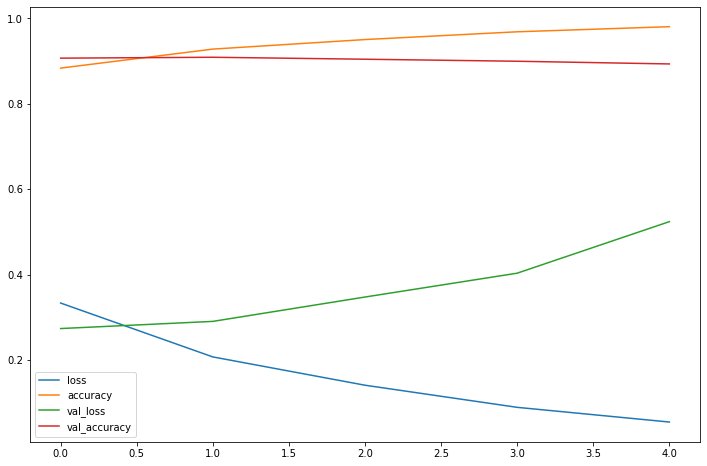

In [35]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [36]:
#Stacking LSTMs Layers

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

In [ ]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [ ]:
# Predicting the class of new news

sample_news = ['The self driving car company Tesla has unveiled its humanoid robot that appeared dancing during the show!']

sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


In [ ]:
# Predicting the class of new news

sample_news = ['This weekend there is a match between two big footbal teams in the national league']
sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


In [ ]:
#Using Gate Recurrent Unit(GRU)

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.1), 
    tf.keras.layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))